# Task 3: Sales Forecasting Using Time Series Analysis

Task Overview

Objective: Forecast the next 12 months of product sales using time series models.

Deliverables:

• Time series decomposition (trend, seasonality)\
• ARIMA, Prophet or LSTM modeling\
• Evaluation metrics (MAE, RMSE)\
• Forecast visualizations

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose


In [42]:
# Mock Data (Python):
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = np.random.poisson(lam=200, size=36) + np.linspace(0, 100, 36)
df = pd.DataFrame({'Date': date_range, 'Sales': sales.round(2)})

/tmp/ipykernel_478162/2065811994.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [43]:
df.head(10)

,Date,Sales
0,2020-01-31,182.00
1,2020-02-29,223.86
2,2020-03-31,200.71
3,2020-04-30,213.57
4,2020-05-31,220.43
5,2020-06-30,208.29
6,2020-07-31,214.14
7,2020-08-31,208.00
8,2020-09-30,219.86
9,2020-10-31,220.71


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [45]:
df.describe()


,Date,Sales
count,36,36.000000
mean,2021-07-15 21:20:00,248.777778
min,2020-01-31 00:00:00,182.000000
25%,2020-10-23 06:00:00,220.357500
50%,2021-07-15 12:00:00,247.640000
75%,2022-04-07 12:00:00,274.215000
max,2022-12-31 00:00:00,314.570000
std,NaN,33.927472


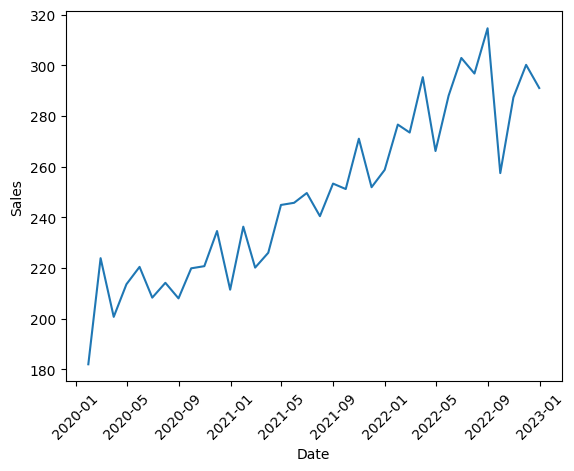

In [46]:
sns.lineplot(data=df, x="Date", y="Sales")
plt.xticks(rotation=45)
plt.show()

In [47]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [48]:
print(df['month'].unique())
print(df.year.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2020 2021 2022]


(1.0, 12.0)

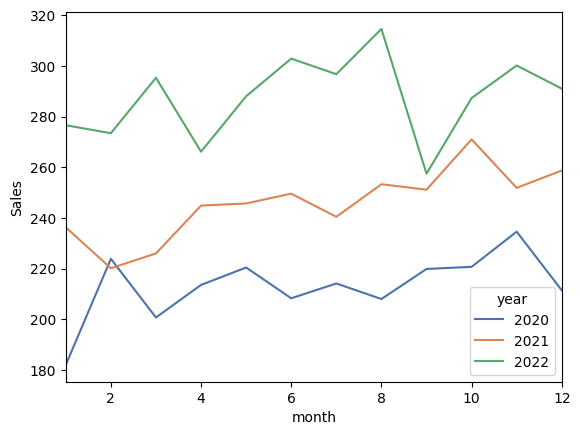

In [49]:
# draw a line plot for each month
sns.lineplot(data=df, x="month", y="Sales", hue="year", palette='deep')
plt.xlim(1, 12)

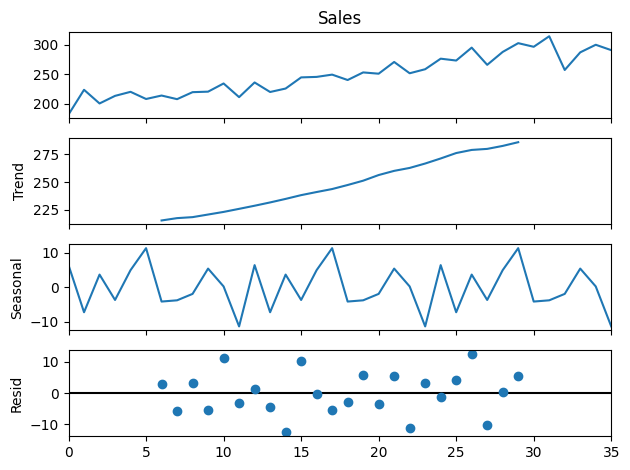

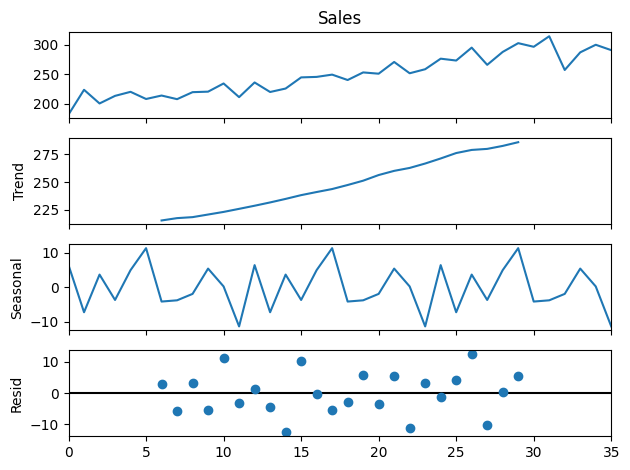

In [50]:
result = seasonal_decompose(df['Sales'], model='additive', period=12) # period for 1 year
result.plot()

In [51]:
# rename the columns
df = df.rename(columns={'Date':'ds', 'Sales': 'y'}) # prophet model take date as ds and target variable as y
df.head()

,ds,y,year,month
0,2020-01-31,182.00,2020,1
1,2020-02-29,223.86,2020,2
2,2020-03-31,200.71,2020,3
3,2020-04-30,213.57,2020,4
4,2020-05-31,220.43,2020,5


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly

model = Prophet() # call the model
model.fit(df)

# make future dataframe and forecast
forecast = model.make_future_dataframe(periods=12, freq='M')  # forecast for 12 months
forecast = model.predict(forecast)


INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmp56bic091/0dcoyy4r.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmp56bic091/6w4lfv28.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50775', 'data', 'file=/tmp/tmp56bic091/0dcoyy4r.json', 'init=/tmp/tmp56bic091/6w4lfv28.json', 'output', 'file=/tmp/tmp56bic091/prophet_modeli82mjpc1/prophet_model-20251001144505.csv', 'method=optimize', 'algorit

In [66]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2023-08-31,331.879207,350.776320,370.404424,331.663277,332.106804,28.792010,28.792010,28.792010,28.792010,28.792010,28.792010,0.0,0.0,0.0,360.671217
44,2023-09-30,334.956461,272.094432,291.079138,334.697064,335.229913,-53.785283,-53.785283,-53.785283,-53.785283,-53.785283,-53.785283,0.0,0.0,0.0,281.171179
45,2023-10-31,338.136291,324.271413,342.306453,337.822754,338.452744,-4.930613,-4.930613,-4.930613,-4.930613,-4.930613,-4.930613,0.0,0.0,0.0,333.205678
46,2023-11-30,341.213545,329.468711,349.015464,340.859587,341.579157,-1.755094,-1.755094,-1.755094,-1.755094,-1.755094,-1.755094,0.0,0.0,0.0,339.458451
47,2023-12-31,344.393375,336.810030,356.803024,343.992231,344.797360,2.892748,2.892748,2.892748,2.892748,2.892748,2.892748,0.0,0.0,0.0,347.286123


In [67]:
df.shape, forecast.shape # 36 + 12 = 48

((36, 4), (48, 16))

In [68]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = df['y']
y_pred = forecast['yhat'][:len(y_true)]

print(f'Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}')
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))

Mean Squared Error: 54.86
MAE:  6.100577729932693
RMSE:  7.406436716511218


In [69]:
# plot the forecast
plot_plotly(model, forecast)